#ADIDASD SALES DATA - EDA(EXPLORATORY DATA ANALYSIS)

##INTRODUCTION

I performed an exploratory data analysis (EDA) to extract valuable insights and reveal hidden patterns, trends, and correlations present in the sales records of Adidas. This article provides an engaging narrative of the findings, uncovering significant implications for the future strategies of the sportswear giant. Utilizing the power of Python, we delve into the realm of data-driven exploration, unlocking the untapped potential within the Adidas sales data and gaining a deeper understanding of the company's performance.

##Data Information -
The data set was gotten from Kaggle and can be accessed using this link. It is a collection of data that includes information on the sales of Adidas products.

##BUSINESS QUESTIONS
1. What is the breakdown of sales by retailers, and how does it vary across different retailers?

2. How does the total profit of retailers compare and vary across different retailers?
3. What is the breakdown of sales by Product?
4. What is the top sales method?
5. What is the average price of products per unit?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
adidas_data=pd.read_excel("/content/sample_data/Adidas US Sales Datasets.xlsx",skiprows=4)

In [3]:
adidas_data.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
adidas_data.drop("Unnamed: 0",axis=1,inplace=True)
adidas_data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [5]:
adidas_data.shape

(9648, 13)

In [6]:
adidas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [7]:
adidas_data["Retailer"].value_counts()

Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: Retailer, dtype: int64

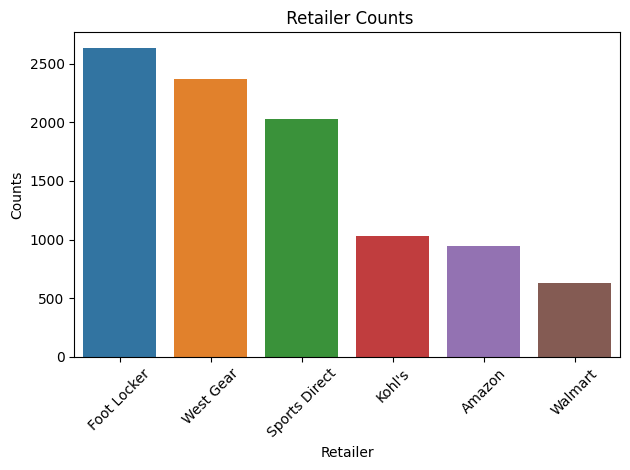

In [8]:
retailer_counts = adidas_data["Retailer"].value_counts()

# Create the custom box plot with 45-degree rotation
sns.barplot(x=retailer_counts.index,y=retailer_counts.values)
plt.xticks(rotation=45)
plt.xlabel("Retailer")
plt.ylabel("Counts")
plt.title(" Retailer Counts")

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
#calculating difference in invoice date
print("minimum invoice date : ",adidas_data['Invoice Date'].min())
print("max_invoice_date",adidas_data['Invoice Date'].max())

print("difference in invoice date :",adidas_data['Invoice Date'].max()-adidas_data['Invoice Date'].min())


minimum invoice date :  2020-01-01 00:00:00
max_invoice_date 2021-12-31 00:00:00
difference in invoice date : 730 days 00:00:00


In [10]:
adidas_data['Region'].value_counts()

West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: Region, dtype: int64

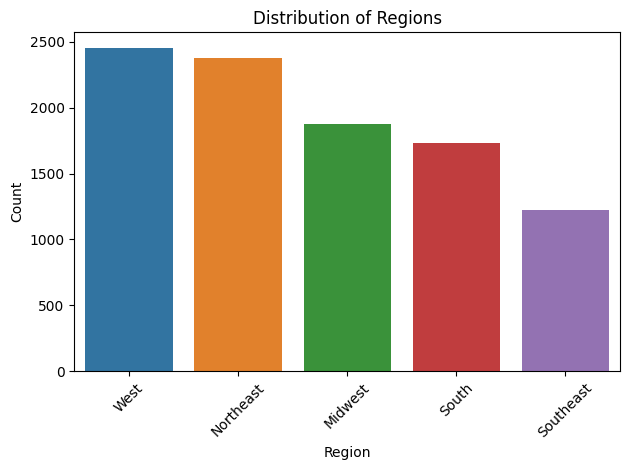

In [11]:
region_counts = adidas_data['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Distribution of Regions")

# Show the plot
plt.tight_layout()
plt.show()

In [12]:
adidas_data["State"].value_counts()

California        432
Texas             432
New York          360
Florida           360
Mississippi       216
Oregon            216
Louisiana         216
Idaho             216
New Mexico        216
Georgia           216
Arkansas          216
Virginia          216
Oklahoma          216
Connecticut       216
Rhode Island      216
Massachusetts     216
Vermont           216
Utah              216
Arizona           216
New Hampshire     216
Pennsylvania      216
Nevada            216
Alabama           216
Tennessee         216
South Dakota      144
Illinois          144
Colorado          144
New Jersey        144
Delaware          144
Maryland          144
West Virginia     144
Indiana           144
Wisconsin         144
Iowa              144
North Dakota      144
Michigan          144
Kansas            144
Missouri          144
Minnesota         144
Montana           144
Kentucky          144
Ohio              144
North Carolina    144
South Carolina    144
Nebraska          144
Maine     

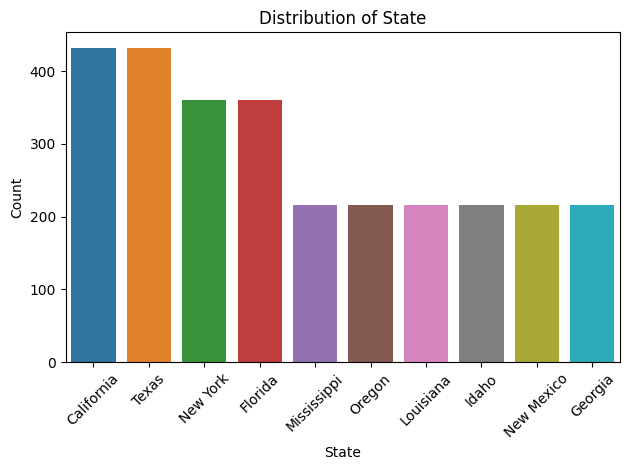

In [13]:
State_Counts=adidas_data['State'].value_counts()
top_10_states = State_Counts.nlargest(10)
sns.barplot(x=top_10_states .index, y=top_10_states .values)
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Distribution of State")

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
adidas_data["Product"].value_counts()

Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: Product, dtype: int64

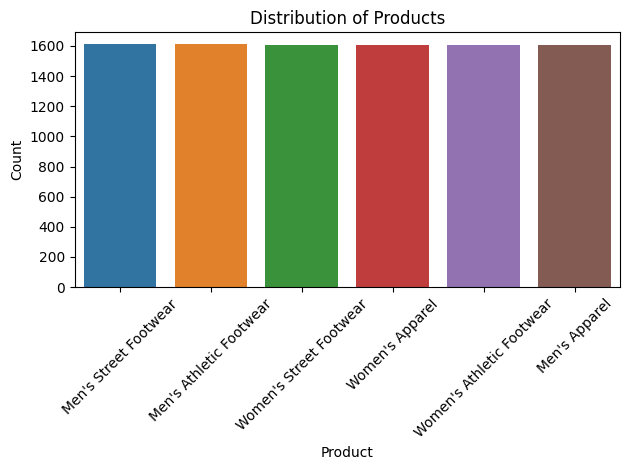

In [15]:
product_count = adidas_data["Product"].value_counts()
sns.barplot(x=product_count.index , y=product_count.values)
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel("Product")
plt.ylabel("Count")
plt.title("Distribution of Products")

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
adidas_data['Sales Method'].value_counts()

Online      4889
Outlet      3019
In-store    1740
Name: Sales Method, dtype: int64

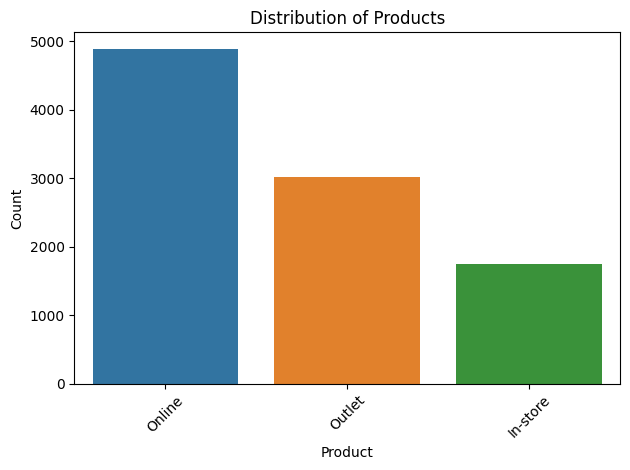

In [17]:
sales_method_counts=adidas_data['Sales Method'].value_counts()
sns.barplot(x=sales_method_counts.index , y=sales_method_counts.values)
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel("Product")
plt.ylabel("Count")
plt.title("Distribution of Products")

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
px.bar(adidas_data.pivot_table(index="Product",columns="Retailer",aggfunc="count")["City"],
       title="Number of products sold by each of the retailers")


In [19]:
sales_counts=adidas_data['Retailer'].value_counts()
px.pie(names=sales_counts.index,values=sales_counts.values,title="Distribution of Sales across Retailers")

In [20]:
px.pie(names=adidas_data.groupby("Sales Method")["Total Sales"].sum().index,values=adidas_data.groupby("Sales Method")["Total Sales"].sum().values,title="Distribution of sales across different methods")

In [21]:
average_price = adidas_data.groupby('Product')['Price per Unit'].mean()

# Reset the index to convert the result to a DataFrame
average_price = average_price.reset_index()

print(average_price.head())

                     Product  Price per Unit
0              Men's Apparel       50.321918
1    Men's Athletic Footwear       43.779503
2      Men's Street Footwear       44.236646
3            Women's Apparel       51.600746
4  Women's Athletic Footwear       41.112702


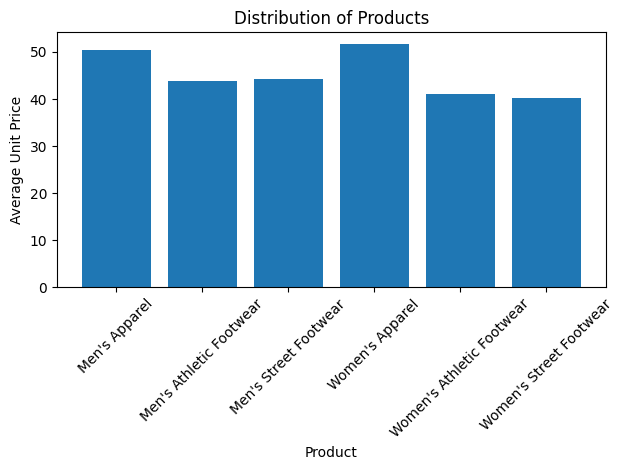

In [22]:
adidas_data.columns = adidas_data.columns.str.strip()

# Calculate the average price per unit for each product
average_price = adidas_data.groupby('Product')['Price per Unit'].mean()

# Reset the index to convert the result to a DataFrame
average_price = average_price.reset_index()

# Create the bar chart using Matplotlib
plt.bar(average_price['Product'], average_price['Price per Unit'])

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel("Product")
plt.ylabel("Average Unit Price")
plt.title("Distribution of Products")

# Show the plot
plt.tight_layout()
plt.show()

In [35]:
# Remove any leading/trailing whitespaces from column names
adidas_data.columns = adidas_data.columns.str.strip()

# Calculate the average operating profit for each retailer
retailer_profit = adidas_data.groupby('Retailer')['Operating Profit'].mean()

# Display the results
print(retailer_profit)

Retailer
Amazon           30367.232150
Foot Locker      30611.348051
Kohl's           35739.080175
Sports Direct    36581.178622
Walmart          41185.387556
West Gear        36085.877498
Name: Operating Profit, dtype: float64


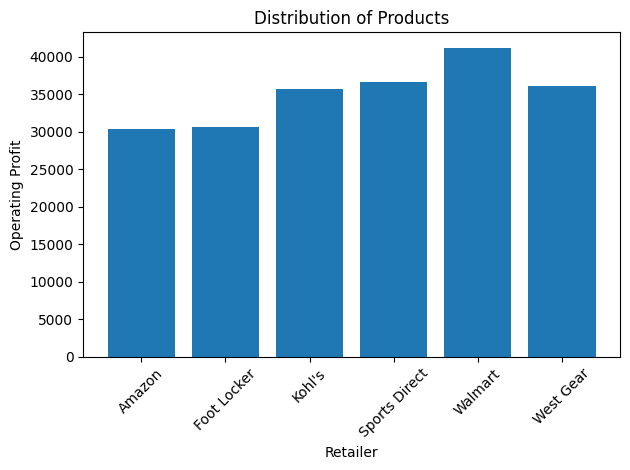

In [30]:

adidas_data.columns = adidas_data.columns.str.strip()
# Calculate the average price per unit for each product
retailer_profit = adidas_data.groupby('Retailer')['Operating Profit'].mean()

retailer_profit = retailer_profit.reset_index()

# Create the bar chart using Matplotlib
plt.bar(retailer_profit['Retailer'], retailer_profit['Operating Profit'])

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel("Retailer")
plt.ylabel("Operating Profit")
plt.title("Distribution of Products")

# Show the plot
plt.tight_layout()
plt.show()